# Project part two #

## Domain  : Sports ##

## Context ##
Company X manages the men's top professional basketball division of the American league system. 
The dataset contains information on all the teams that have participated in all the past tournaments. It has data 
about how many baskets each team scored, conceded, how many times they came within the first 2 positions, 
how many tournaments they have qualified, their best position in the past, etc

## Attribute information ##
1. Team: Team’s name
2. Tournament: Number of played tournaments.
3. Score: Team’s score so far.
4. PlayedGames: Games played by the team so far.
5. WonGames: Games won by the team so far.
6. DrawnGames: Games drawn by the team so far.
7. LostGames: Games lost by the team so far.
8. BasketScored: Basket scored by the team so far.
9. BasketGiven: Basket scored against the team so far.
10. TournamentChampion: How many times the team was a champion of the tournaments so far.
11. Runner-up: How many times the team was a runners-up of the tournaments so far.
12. TeamLaunch: Year the team was launched on professional basketball.
13. HighestPositionHeld: Highest position held by the team amongst all the tournaments played.

# Solution #

## 1. Filtering the data ##

Key notes:
1. Data had many '-' (hyphens), df1 = df1[df1!='-'] was used to elimiate all such values
2. TeamLaunch initially had object as its data type, first 4 letters were taken using df1.TeamLaunch = df1.TeamLaunch.str[:4]
3. apply(pd.to_numeric) was used to convert data from object to numerical type for analysis
4. last row (60th) was dropped as it did not have any values.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes = True)
%matplotlib inline

df1 = pd.read_csv('basketball.csv')
df1 = df1[df1!='-']
print(df1.info())
df1.TeamLaunch = df1.TeamLaunch.str[:4]
df1.rename(columns = {"Runner-up":"RunnerUp"},inplace = True)
df1[['Score','PlayedGames','WonGames','DrawnGames','LostGames','BasketScored','BasketGiven','TournamentChampion','RunnerUp','TeamLaunch']] = df1[['Score','PlayedGames','WonGames','DrawnGames','LostGames','BasketScored','BasketGiven','TournamentChampion','RunnerUp','TeamLaunch']].apply(pd.to_numeric)
df1.drop(60, axis = 0, inplace = True)
df1.dropna
df1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Team                 61 non-null     object
 1   Tournament           61 non-null     int64 
 2   Score                60 non-null     object
 3   PlayedGames          60 non-null     object
 4   WonGames             60 non-null     object
 5   DrawnGames           60 non-null     object
 6   LostGames            60 non-null     object
 7   BasketScored         60 non-null     object
 8   BasketGiven          60 non-null     object
 9   TournamentChampion   9 non-null      object
 10  Runner-up            13 non-null     object
 11  TeamLaunch           61 non-null     object
 12  HighestPositionHeld  61 non-null     int64 
dtypes: int64(2), object(11)
memory usage: 6.3+ KB
None


,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,RunnerUp,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385.0,2762.0,1647.0,552.0,563.0,5947.0,3140.0,33.0,23.0,1929,1
1,Team 2,86,4262.0,2762.0,1581.0,573.0,608.0,5900.0,3114.0,25.0,25.0,1929,1
2,Team 3,80,3442.0,2614.0,1241.0,598.0,775.0,4534.0,3309.0,10.0,8.0,1929,1
3,Team 4,82,3386.0,2664.0,1187.0,616.0,861.0,4398.0,3469.0,6.0,6.0,1931,1
4,Team 5,86,3368.0,2762.0,1209.0,633.0,920.0,4631.0,3700.0,8.0,7.0,1929,1
5,Team 6,73,2819.0,2408.0,990.0,531.0,887.0,3680.0,3373.0,1.0,4.0,1934,1
6,Team 7,82,2792.0,2626.0,948.0,608.0,1070.0,3609.0,3889.0,NaN,NaN,1929,3
7,Team 8,70,2573.0,2302.0,864.0,577.0,861.0,3228.0,3230.0,2.0,3.0,1929,1
8,Team 9,58,2109.0,1986.0,698.0,522.0,766.0,2683.0,2847.0,NaN,1.0,1939,2
9,Team 10,51,1884.0,1728.0,606.0,440.0,682.0,2159.0,2492.0,1.0,NaN,1932,1


## Printing teams with highest and lowest score 

In [3]:
 
print('Team with the highest score:',df1[df1['Score'] == df1['Score'].max()].iloc[[0],[0]],'with score',df1['Score'].max(),'\n')
print('Team with the lowest score:',df1[df1['Score'] == df1['Score'].min()].iloc[[0],[0]],'with score',df1['Score'].min())

Team with the highest score:      Team
0  Team 1 with score 4385.0 

Team with the lowest score:        Team
59  Team 60 with score 14.0


## Printing teams with highest and lowest baskets 

In [4]:
print('Team with the maximum baskets:',df1[df1['BasketScored'] == df1['BasketScored'].max()].iloc[[0],[0]],'with baskets',df1['BasketScored'].max(),'\n')
print('Team with the minimum baskets:',df1[df1['BasketScored'] == df1['BasketScored'].min()].iloc[[0],[0]],'with baskets',df1['BasketScored'].min())

Team with the maximum baskets:      Team
0  Team 1 with baskets 5947.0 

Team with the minimum baskets:        Team
59  Team 60 with baskets 34.0


## Printing oldest and newest teams

In [5]:
print('Oldest team:',df1[df1['TeamLaunch'] == df1['TeamLaunch'].min()].iloc[[0],[0]],'in year',df1['TeamLaunch'].min(),'\n')
print('Newest team:',df1[df1['TeamLaunch'] == df1['TeamLaunch'].max()].iloc[[0],[0]],'in year',df1['TeamLaunch'].max())

Oldest team:      Team
0  Team 1 in year 1929 

Newest team:        Team
55  Team 56 in year 2016


## Printing best and lowest performing team

1. 3 columns are created - WinRatio, LooseRatio and DrawRatio to further asses their performances
2. Winratio was used as a the criteria for selecting teams based on performances.

In [6]:
df1['WinRatio'] = df1['WonGames']/df1['PlayedGames']
df1['LooseRatio'] = df1['LostGames']/df1['PlayedGames']
df1['DrawRatio'] = df1['DrawnGames']/df1['PlayedGames']


print('Best performing team:',df1[df1['WinRatio'] == df1['WinRatio'].max()].iloc[[0],[0]],'with win percent',(df1['WinRatio'].max()*100),'% ','\n')
print('Worst performing team:',df1[df1['WinRatio'] == df1['WinRatio'].min()].iloc[[0],[0]],'with win percent',(df1['WinRatio'].min()*100),'%')

Best performing team:      Team
0  Team 1 with win percent 59.630702389572775 %  

Worst performing team:        Team
59  Team 60 with win percent 16.666666666666664 %


## Visualisation using pair plot

1. A new dataframe named as df2 is created using major attributes - WinRatio,TournamentChampion,Score,RunnerUp,HighestPositionHeld and TeamLaunch

2. Later to utilize the team numbers, a new row: TeamNo was added using np.arange(1,61) as each number corresponded to their eqivalent team. This was performed as the column 'Team' was categorical and hence initially could not be the part of pairplot.

## Key observations from the pair plot

1. Older teams had a better win ratio and scores than new ones
2. Older teams have been better at winning and scoring 2nd position in tournaments
3. Teams with higher score have higher value of thw WinRatio
4. Only few old teams have secured '1' as the highest position held 

<ipython-input-13-e447a34f9866>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['TeamNo'] = np.arange(1,61)


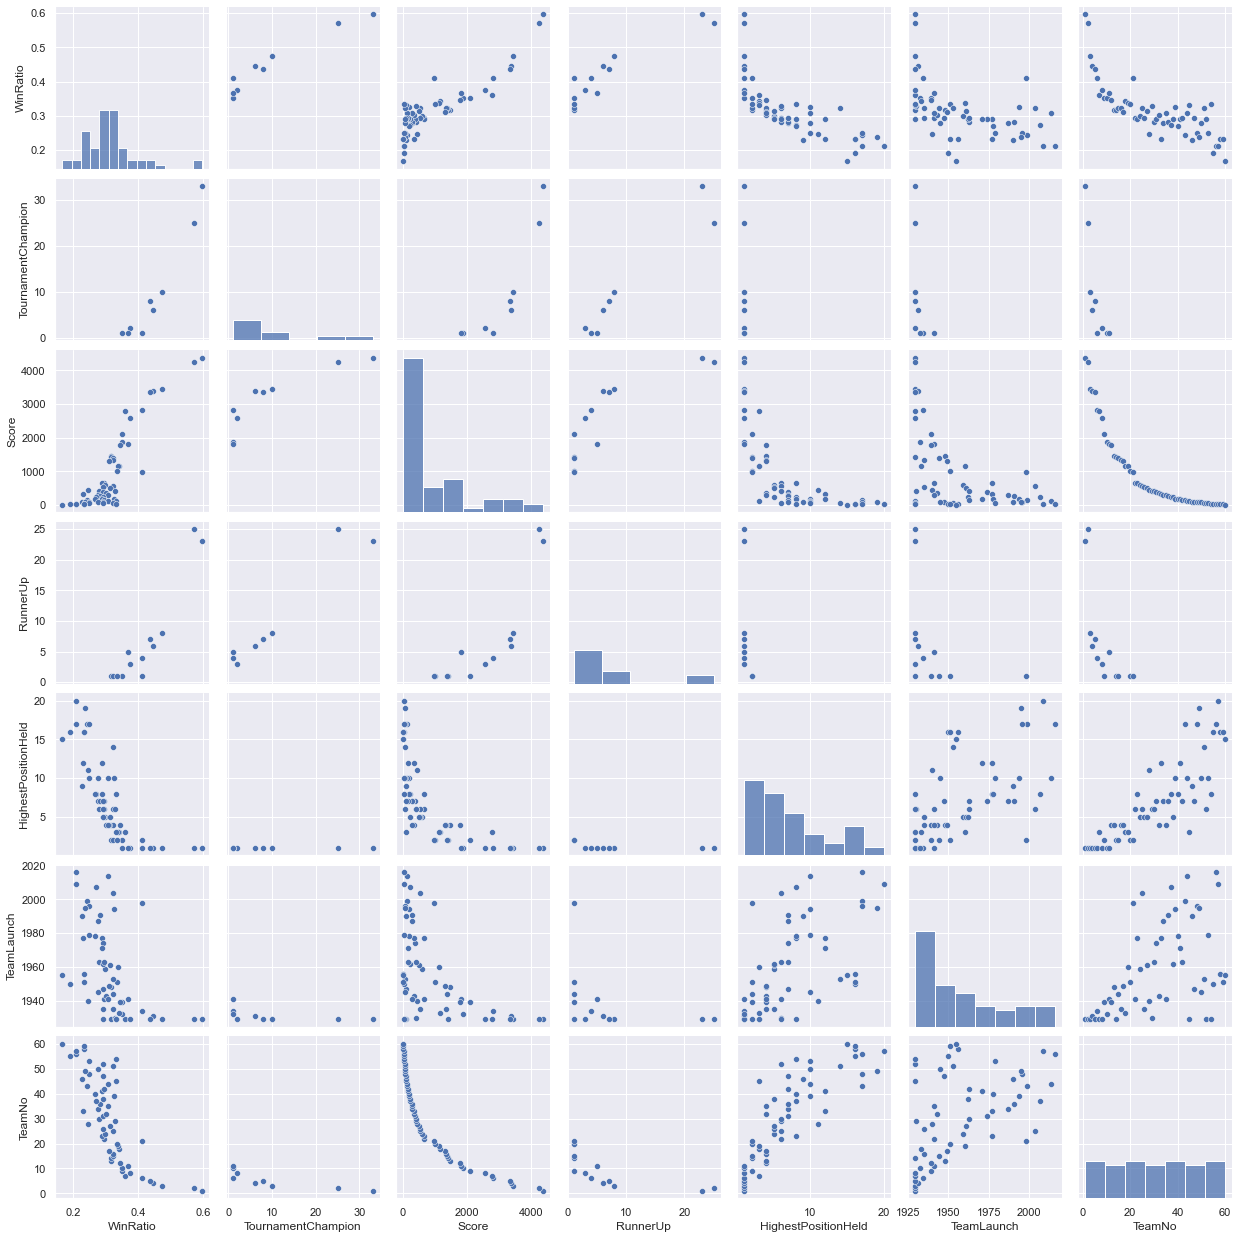

In [13]:

df2 = df1[['WinRatio','TournamentChampion','Score','RunnerUp','HighestPositionHeld','TeamLaunch']]
df2['TeamNo'] = np.arange(1,61)
df2
sns.pairplot(data = df2); # hue = 'TournamentChampion');

## Visulisation 2 ##

1. new dataframe was created to analyse top 40% (selection based on winning ratio) of the teams.

### Insights from catlpots

1. only team 1 - team 11 have ever won a tournament out of which team 1, team 2, team 3 had the best winning records
2. In comparativeley newer teams, team 15,16,21 and 22 have been a runner up once, eventually falling into good pick zone.
3. Out of the newer teams, team 21,22,25,29,39,45,51 and 54 were able to pass the top 40% filter, these teams can be considered for selection in upcoming trials.
4. In the newer teams 'Team 21' distincts out in the chart due to it's high winratio. If I was given an option to choose 1 team due to a limited budget: team 21 !! (Also a runner up as aforementioned)
5. If budget is curtailed further, team 54: fairly new team might be a good pick 

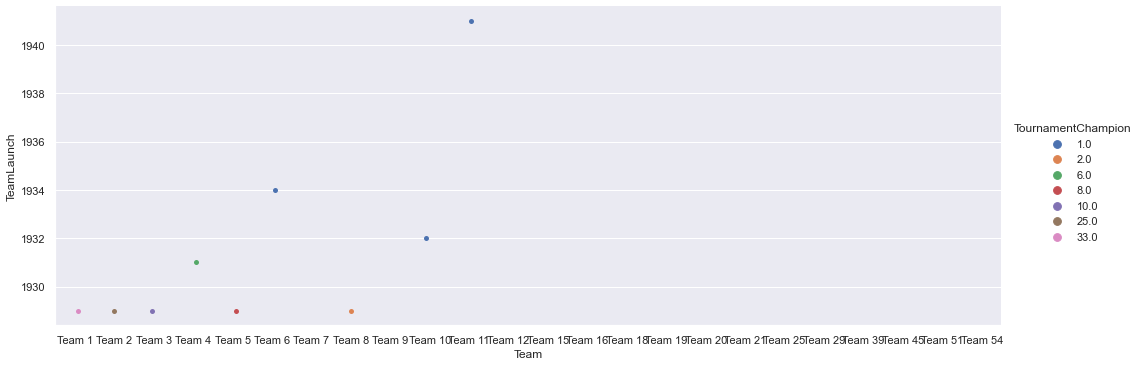

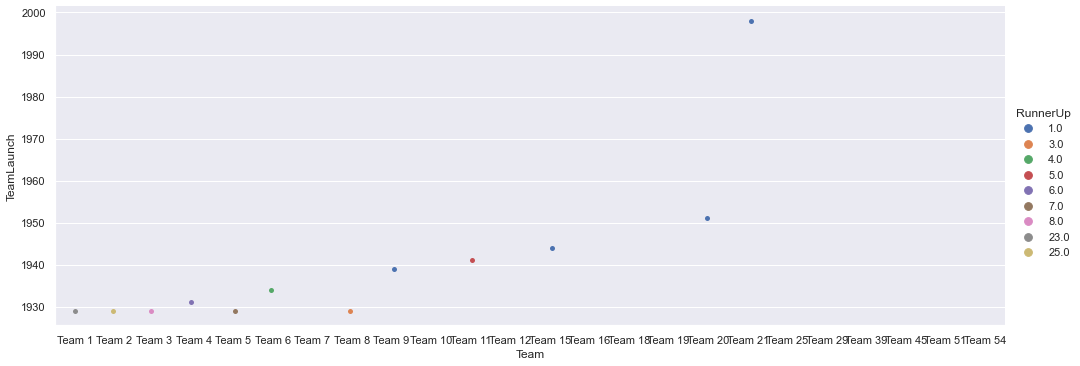

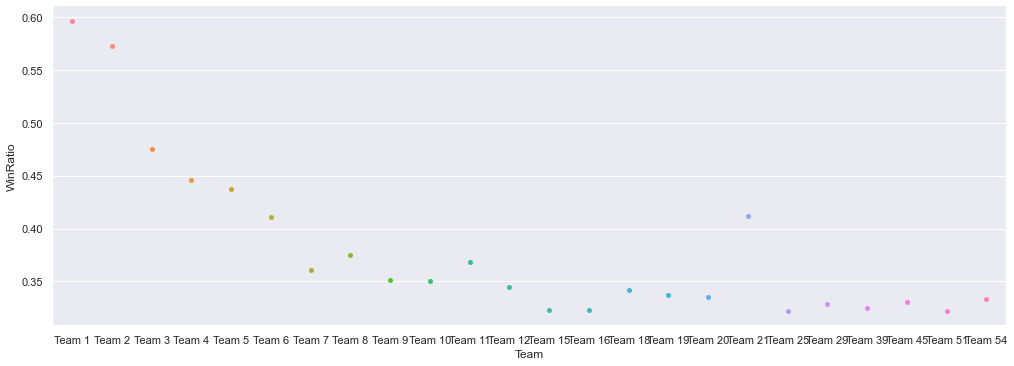

In [18]:
df3 = df1[df1['WinRatio']>=df1['WinRatio'].quantile(q=0.6)]
sns.catplot(data = df3, x = 'Team', y ='TeamLaunch', aspect = 2.8, hue = 'TournamentChampion');
sns.catplot(data = df3, x = 'Team', y ='TeamLaunch', aspect = 2.8, hue = 'RunnerUp');
sns.catplot(data = df3, x = 'Team', y = 'WinRatio', aspect = 2.8, kind = 'swarm');
